In [52]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path
from itertools import product

In [53]:
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-11-17__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_sorted = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "l", "lmbda"],
          descending=[False, False, False]
        )
)

print(df_sorted)

shape: (45, 73)
┌───────────┬─────────────┬─────┬─────┬───┬───────────────┬───────────────┬───────────┬────────────┐
│ formalism ┆ landscape   ┆ s   ┆ l   ┆ … ┆ xt_over_t     ┆ G             ┆ bound_low ┆ bound_high │
│ ---       ┆ ---         ┆ --- ┆ --- ┆   ┆ ---           ┆ ---           ┆ ---       ┆ ---        │
│ str       ┆ str         ┆ i64 ┆ i64 ┆   ┆ list[f64]     ┆ list[f64]     ┆ i64       ┆ i64        │
╞═══════════╪═════════════╪═════╪═════╪═══╪═══════════════╪═══════════════╪═══════════╪════════════╡
│ 2         ┆ homogeneous ┆ 0   ┆ 10  ┆ … ┆ [65.72,       ┆ [1.417313,    ┆ 5         ┆ 80         │
│           ┆             ┆     ┆     ┆   ┆ 87.765, …     ┆ 1.124879, …   ┆           ┆            │
│           ┆             ┆     ┆     ┆   ┆ 91.074141]    ┆ 0.95835…      ┆           ┆            │
│ 2         ┆ homogeneous ┆ 150 ┆ 10  ┆ … ┆ [7.18, 5.375, ┆ [0.582281,    ┆ 5         ┆ 80         │
│           ┆             ┆     ┆     ┆   ┆ … 5.423232]   ┆ 2.032667, …   ┆

In [54]:
# chromatin
Lmin        = df_sorted["Lmin"][0]
Lmax        = df_sorted["Lmax"][0]
bps         = df_sorted["bps"][0]
L = np.arange(Lmin, Lmax, bps)

# time
tmax        = df_sorted["tmax"][0]
dt          = df_sorted["dt"][0]
t = np.arange(0, tmax, dt)

# probas
mu          = df_sorted["mu"][0]
theta       = df_sorted["theta"][0]
rtot_bind   = df_sorted["rtot_bind"][0]
rtot_rest   = df_sorted["rtot_rest"][0]

# values
s = np.unique(df_sorted["s"])
l = np.unique(df_sorted["l"])
lmbda = np.unique(df_sorted["lmbda"])

[90.]


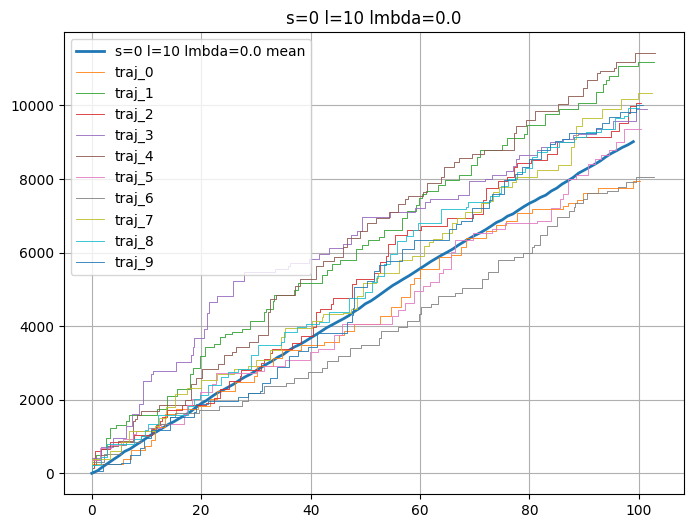

[67.5]


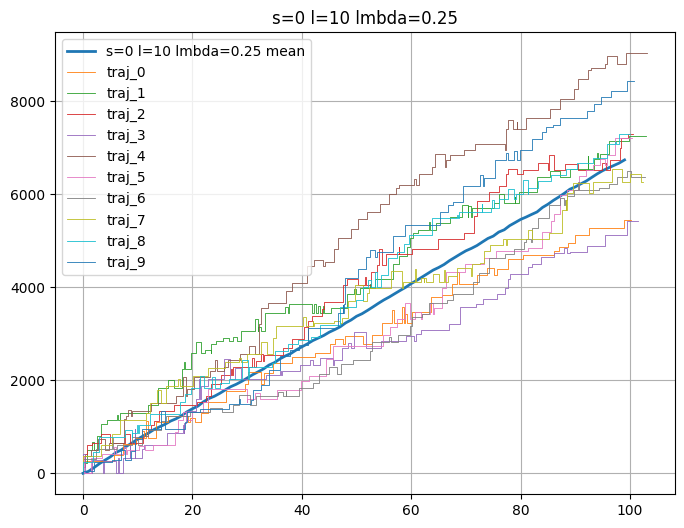

[45.]


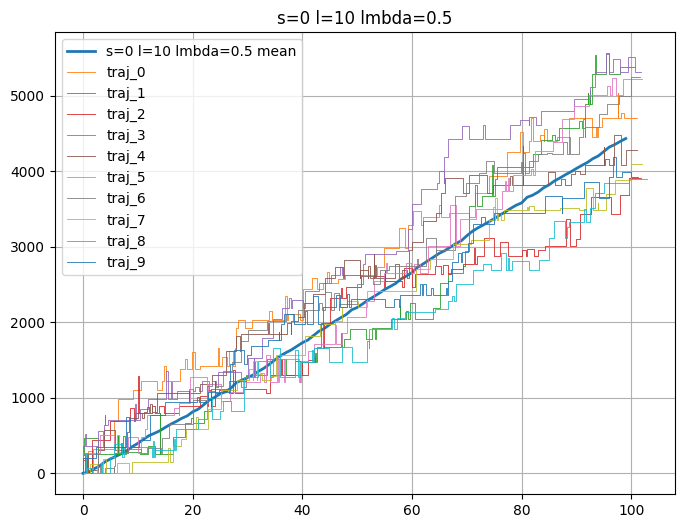

[22.5]


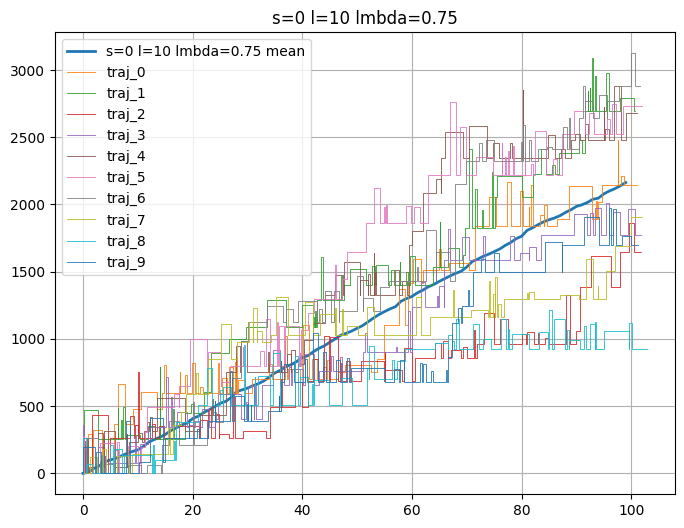

[0.]


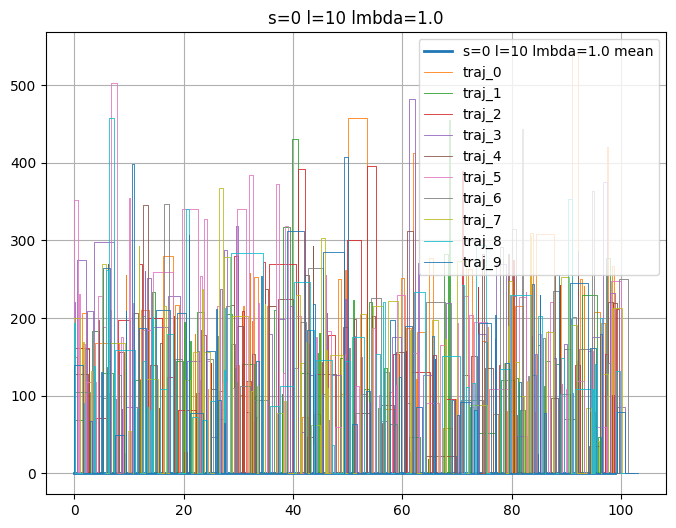

[90.]


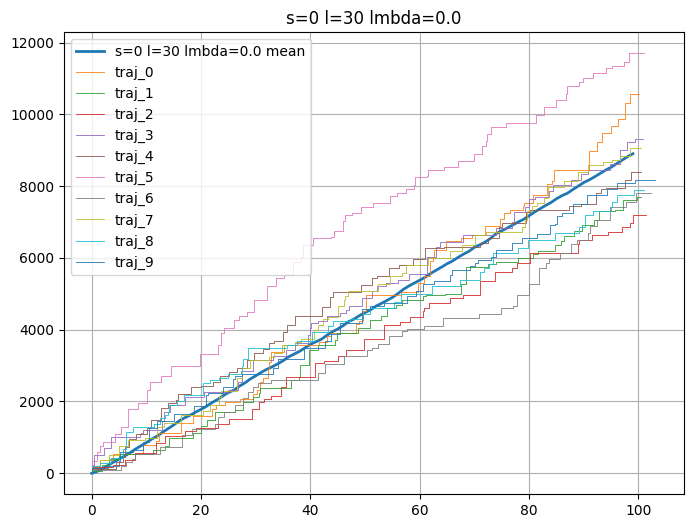

[67.5]


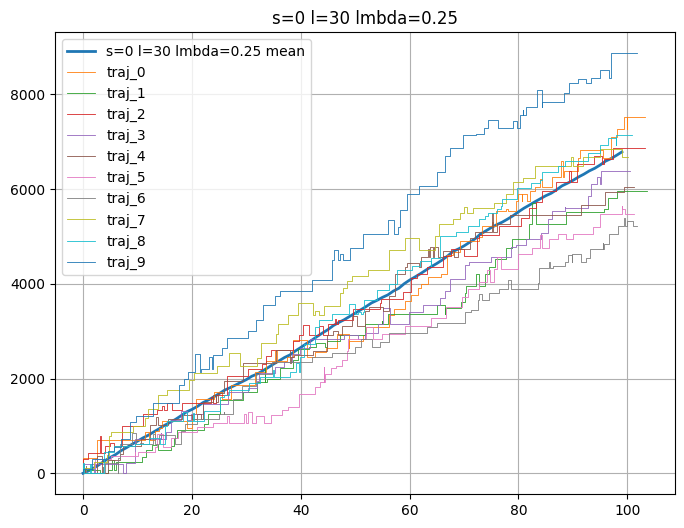

[45.]


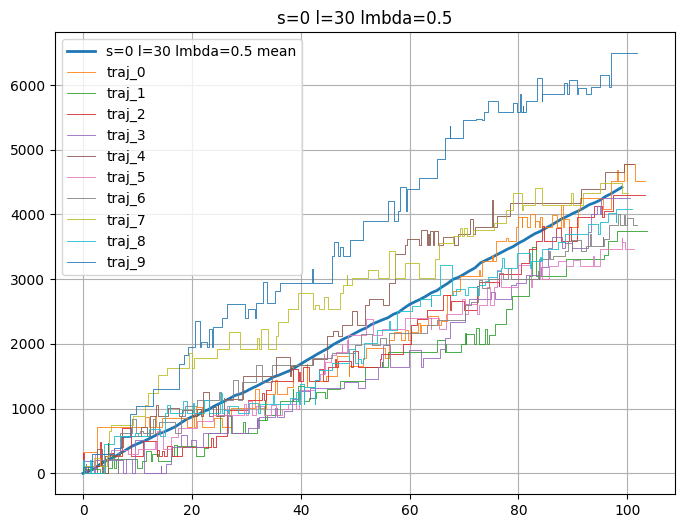

[22.5]


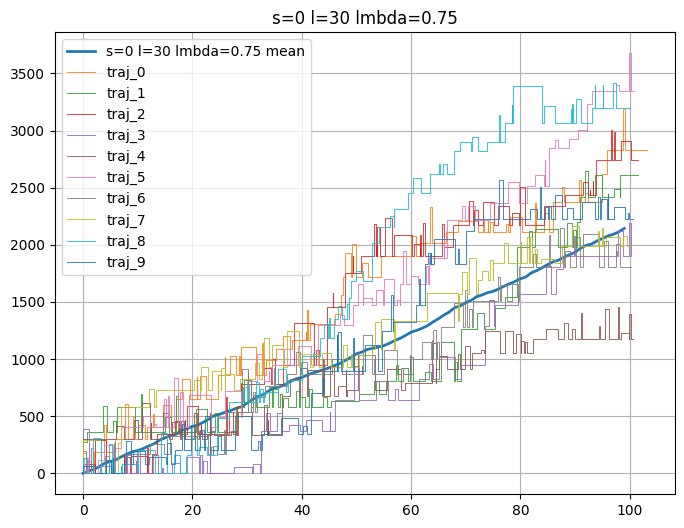

[0.]


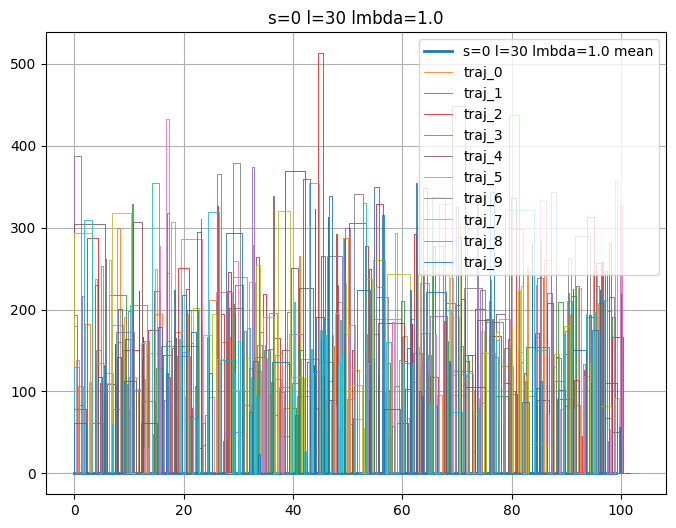

[90.]


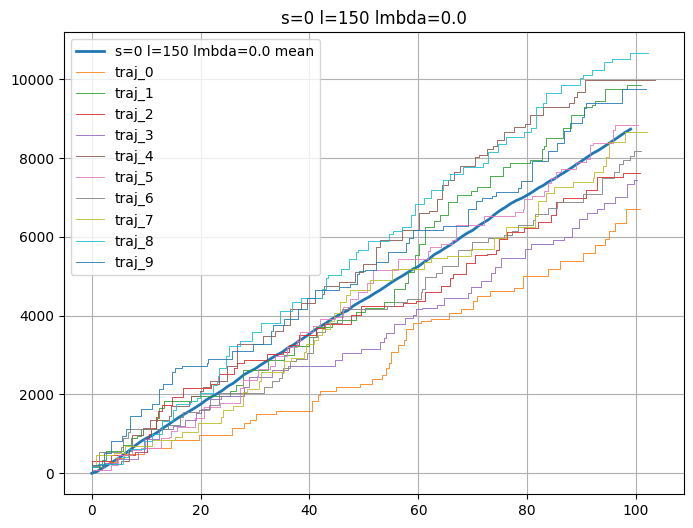

[67.5]


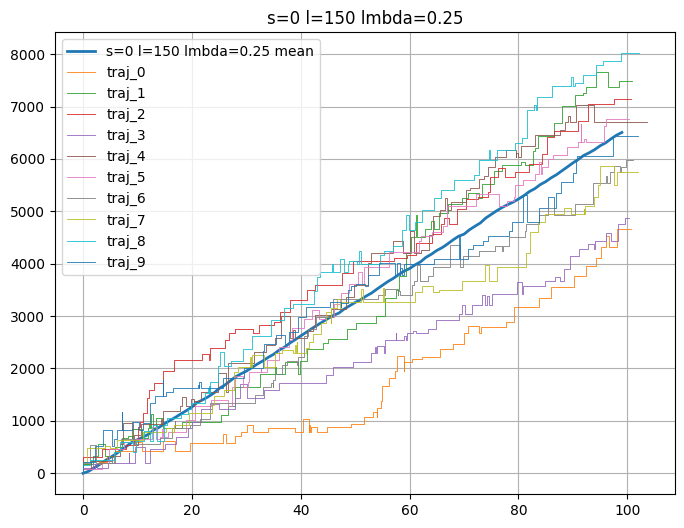

[45.]


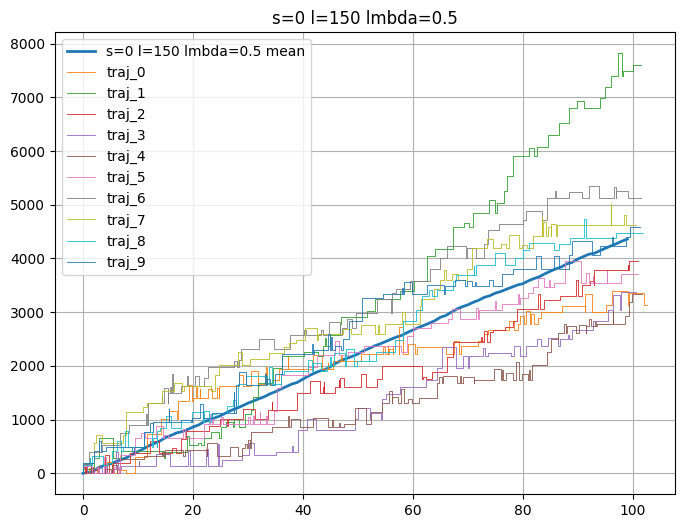

[22.5]


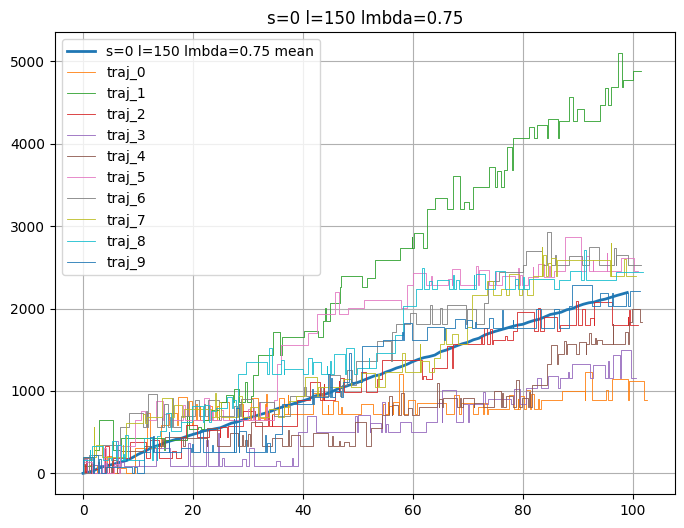

[0.]


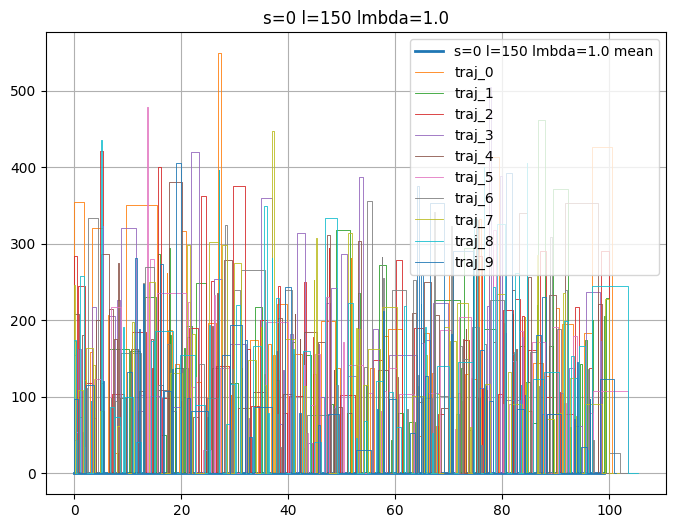

[22.5]


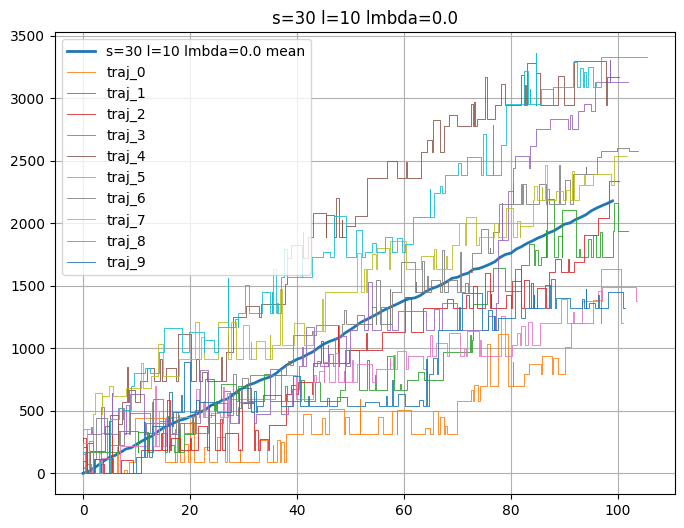

[16.875]


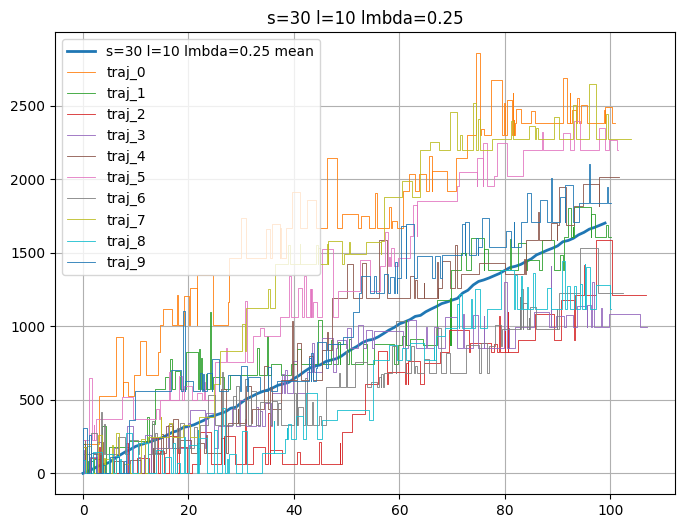

[11.25]


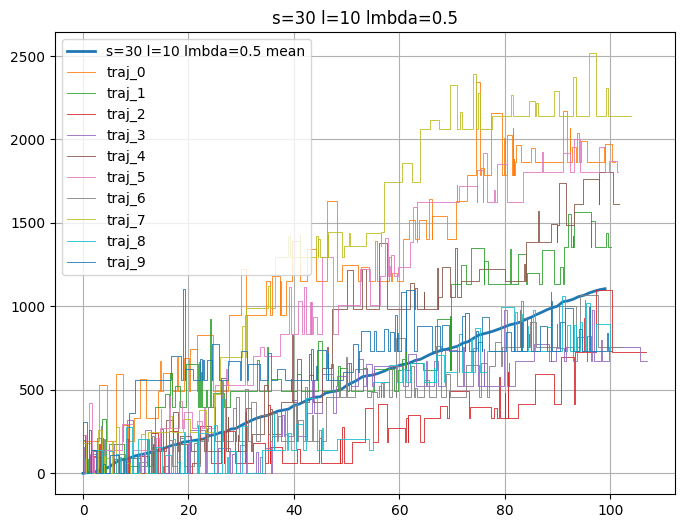

[5.625]


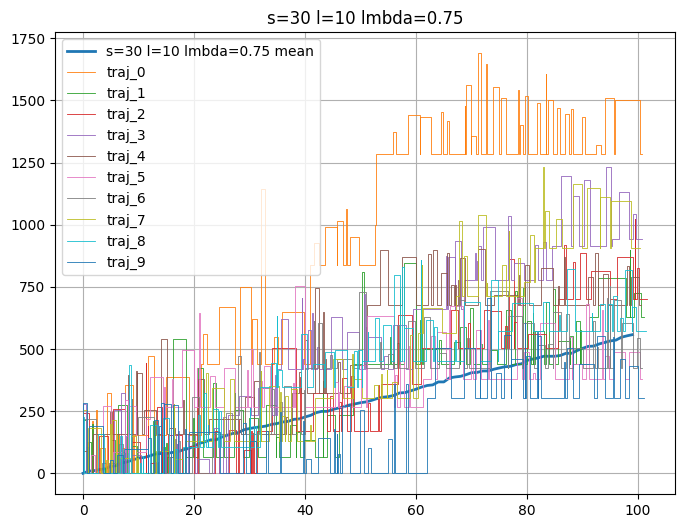

[0.]


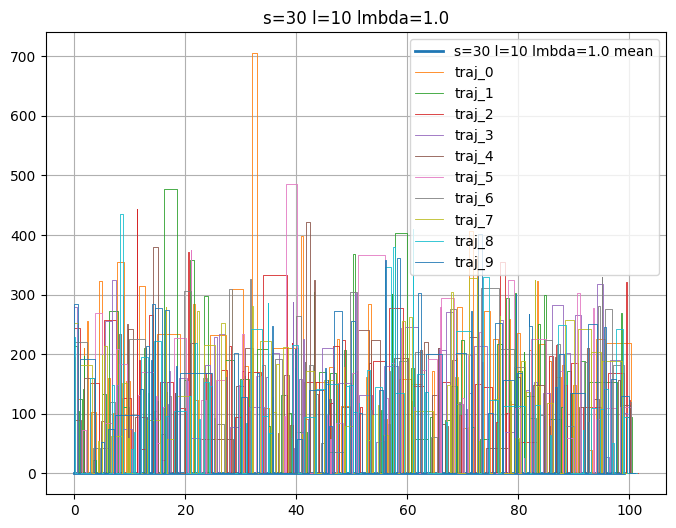

[45.]


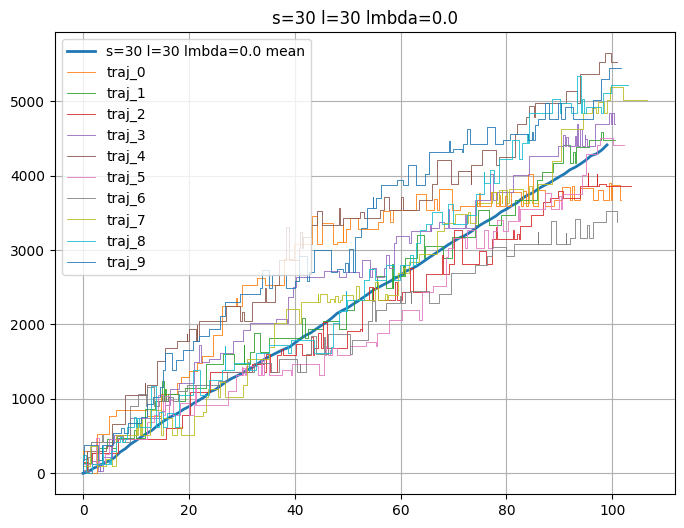

[33.75]


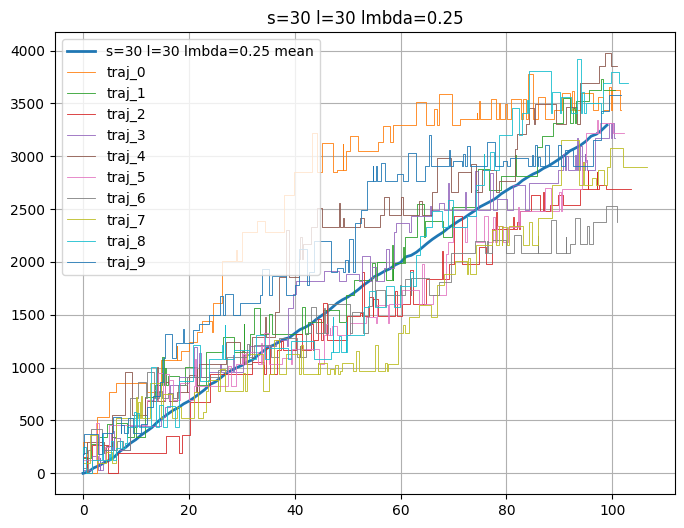

[22.5]


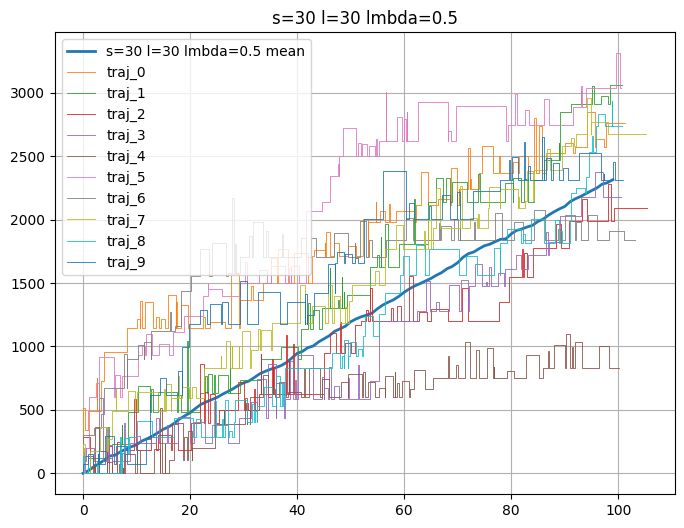

[11.25]


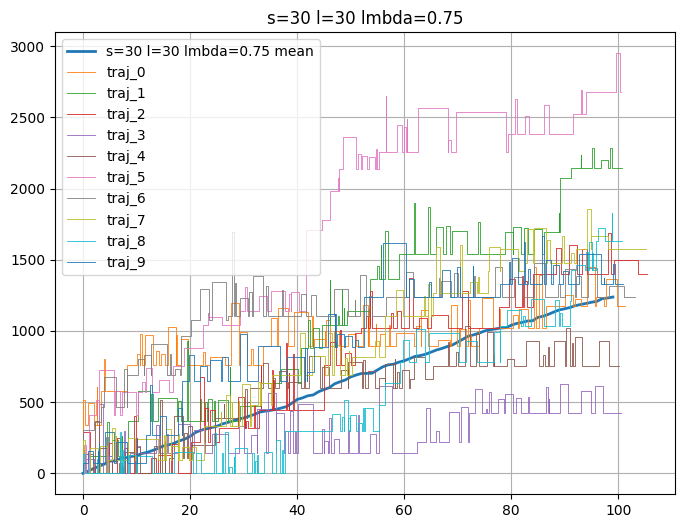

[0.]


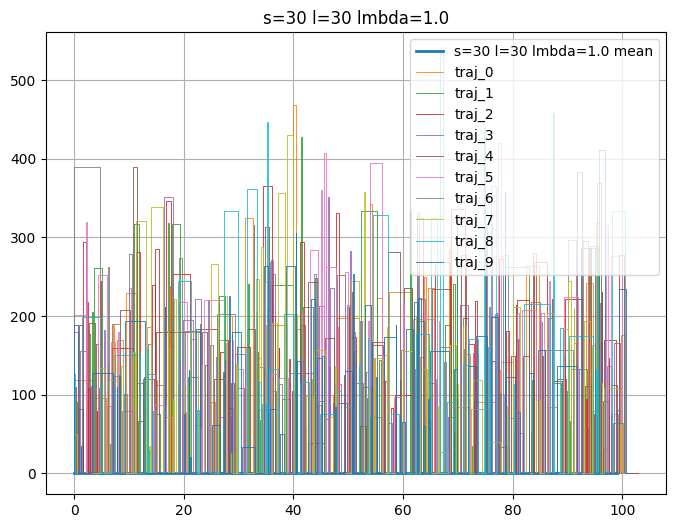

[75.]


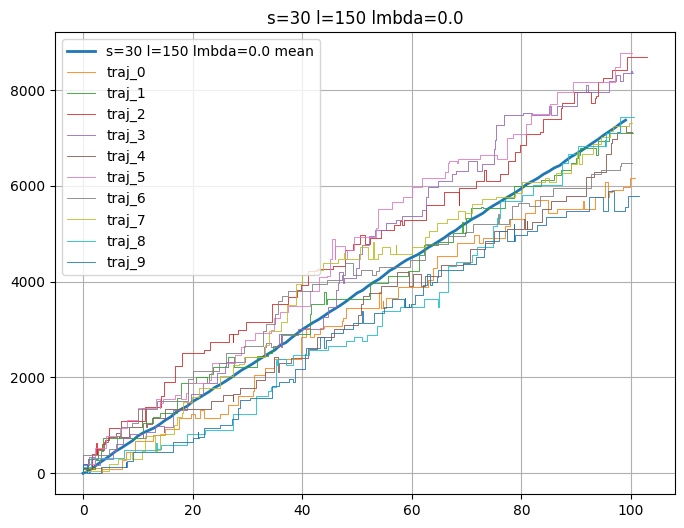

[56.25]


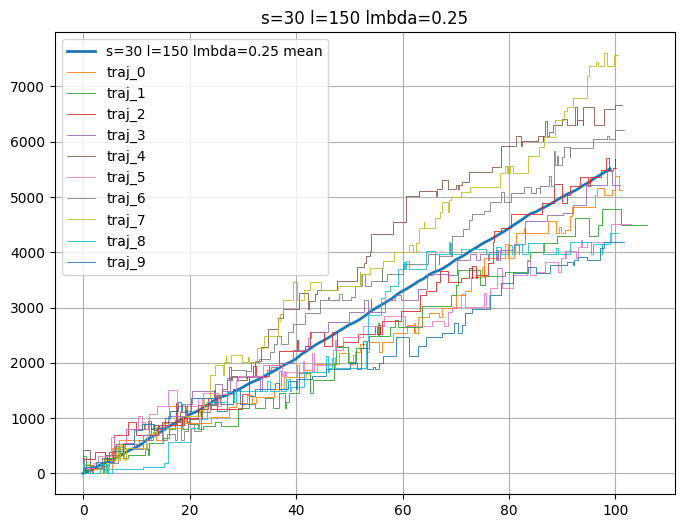

[37.5]


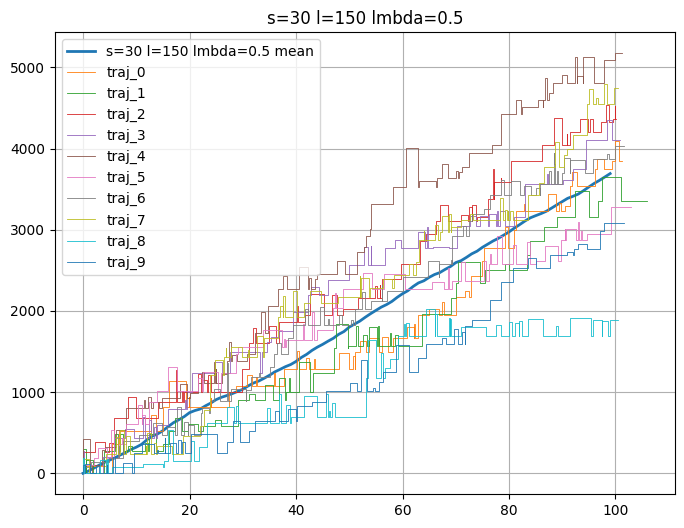

[18.75]


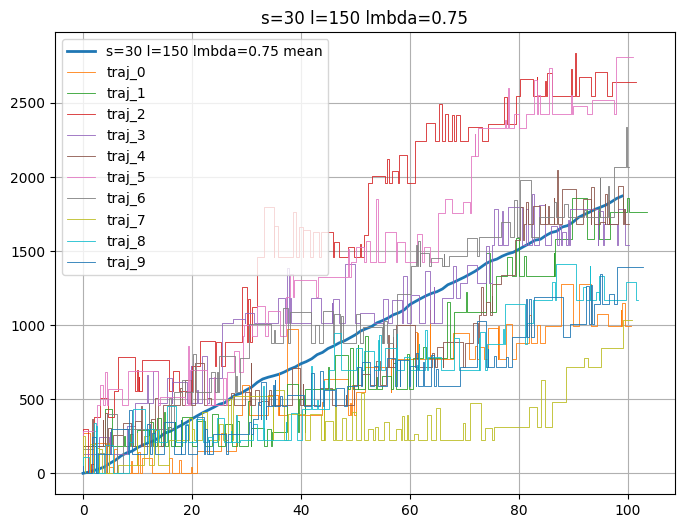

[0.]


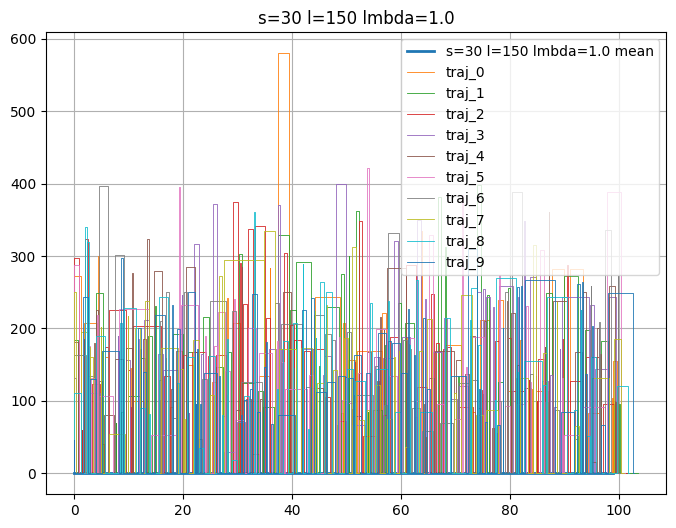

[5.625]


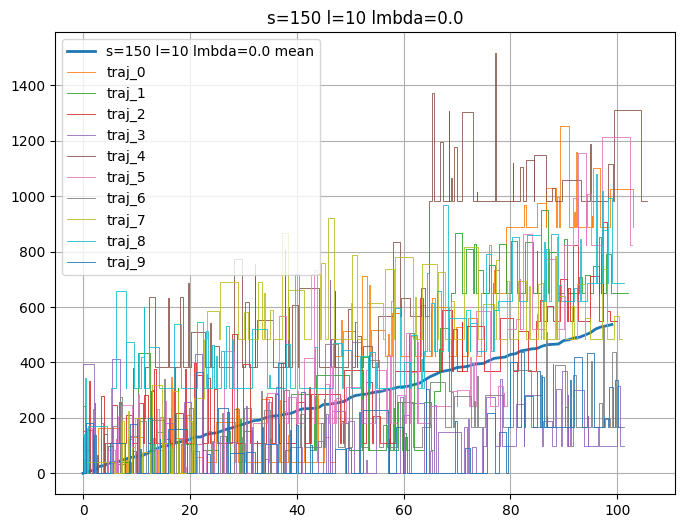

[4.21875]


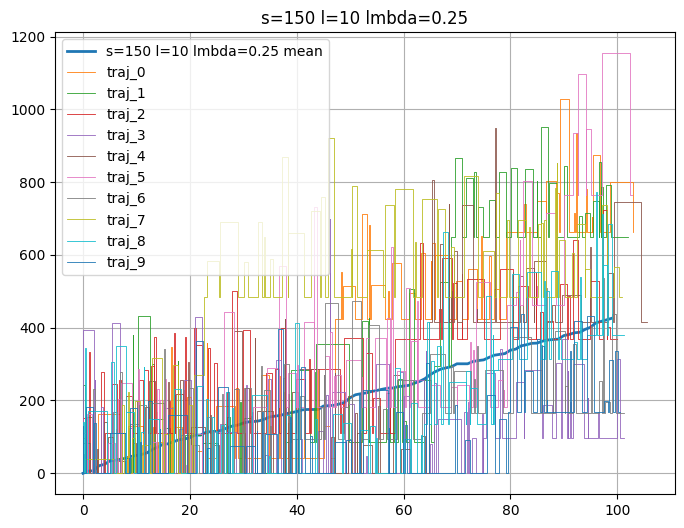

[2.8125]


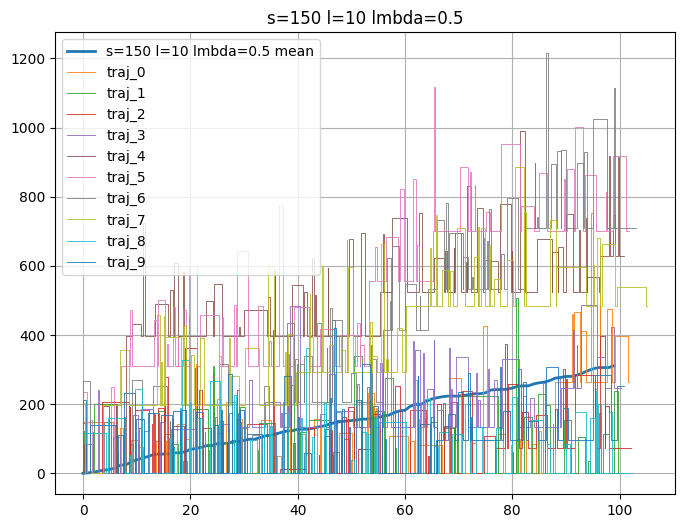

[1.40625]


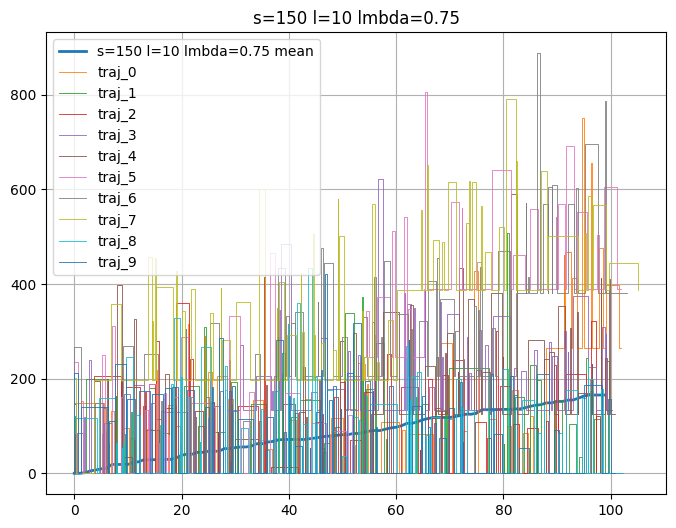

[0.]


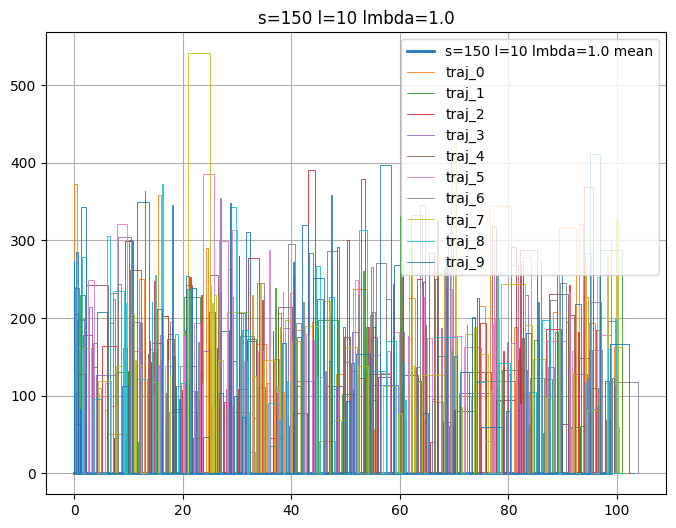

[15.]


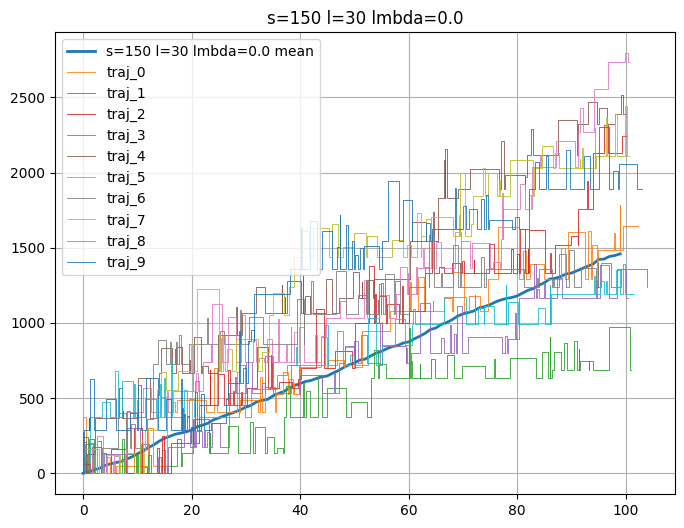

[11.25]


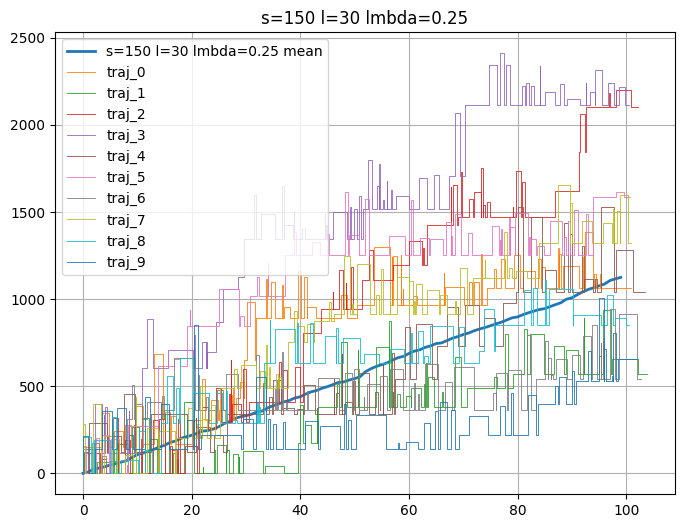

[7.5]


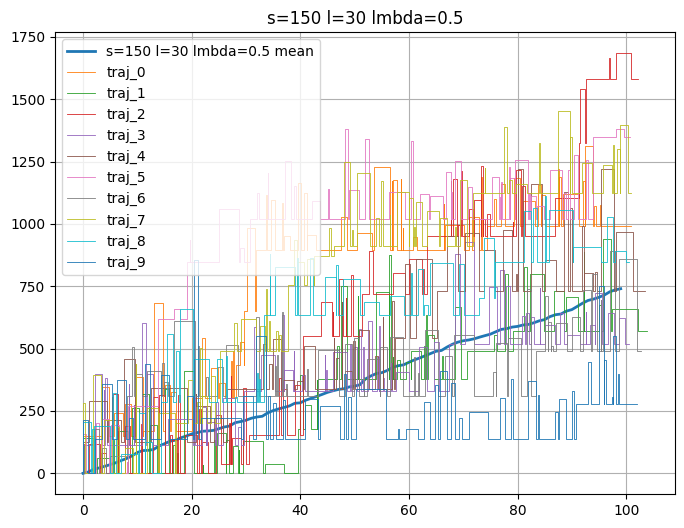

[3.75]


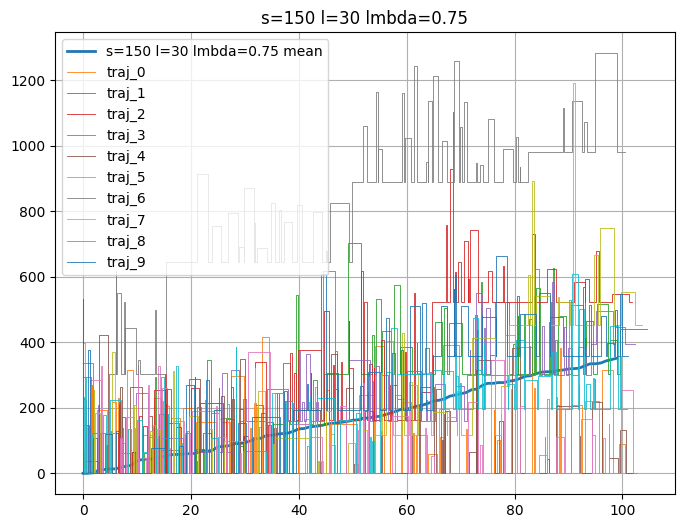

[0.]


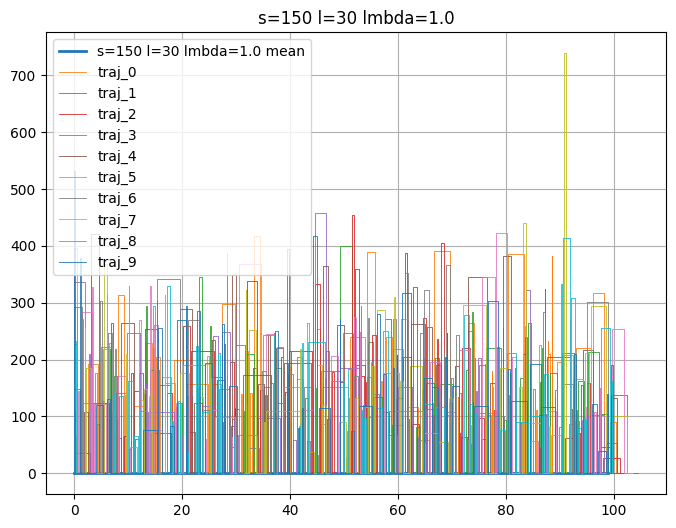

[45.]


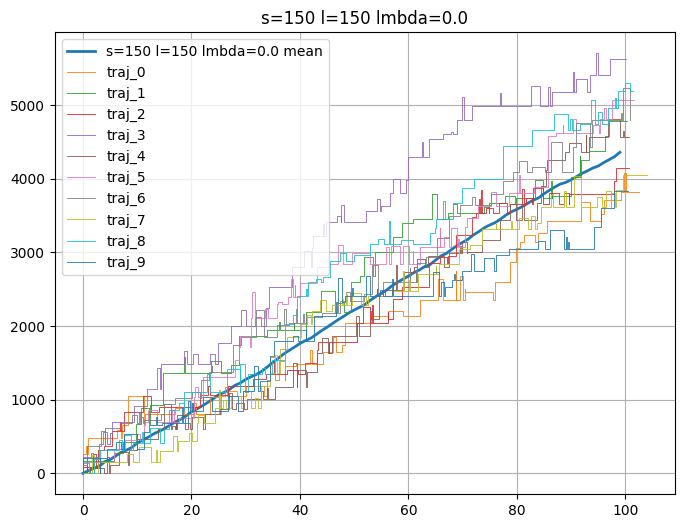

[33.75]


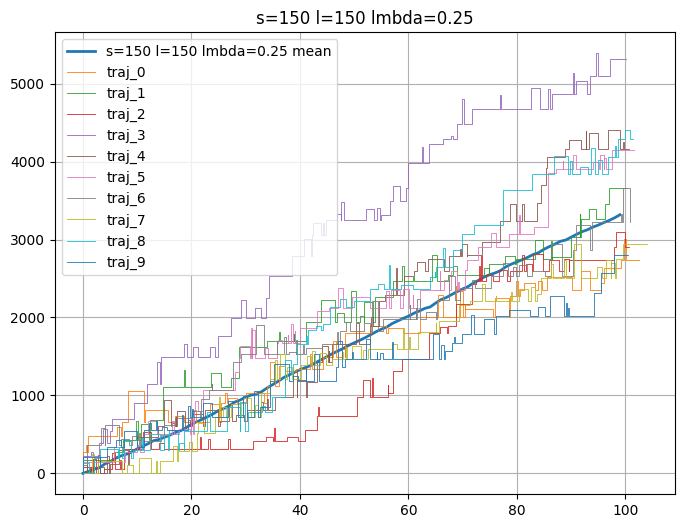

[22.5]


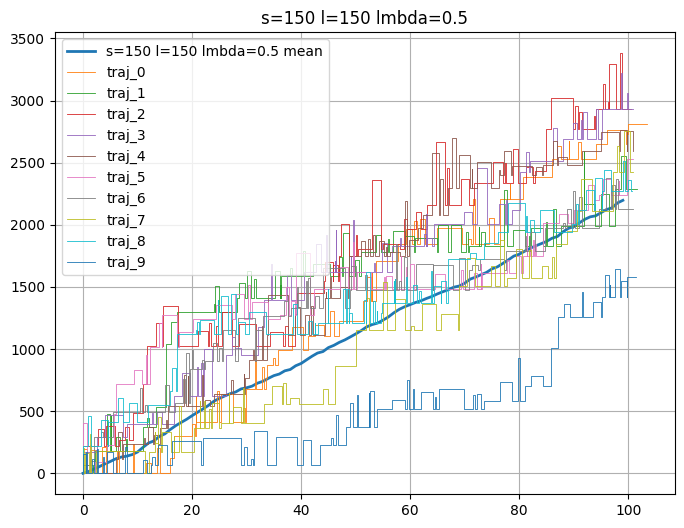

[11.25]


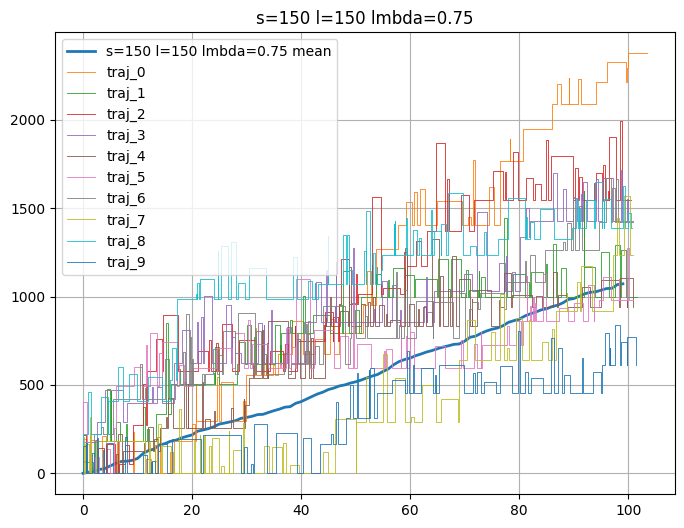

[0.]


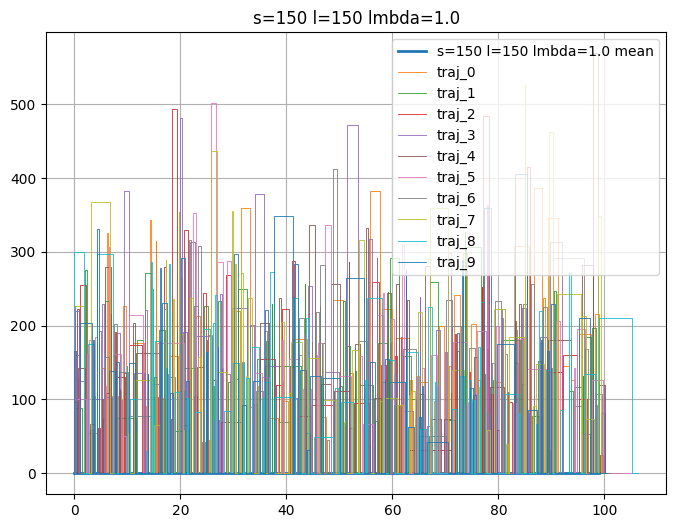

In [ ]:
def get_data(df: pl.DataFrame, s: int, l: int, lmbda: float) -> pl.DataFrame:
    return df.filter(
        (pl.col("s") == s) &
        (pl.col("l") == l) &
        (pl.col("lmbda") == lmbda)
    )


for s_val, l_val, lmbda_val in product(s, l, lmbda):
    df = get_data(df=df_sorted, s=s_val, l=l_val, lmbda=lmbda_val)
    
    t_matrix        = df["t_matrix"][0]. to_numpy()
    x_matrix        = df["x_matrix"][0]. to_numpy()
    results_mean    = df["results_mean"][0].to_numpy()
    v_th_sim        = df["v_th_sim"].to_numpy()
    print(v_th_sim)
    
    plt.figure(figsize=(8,6))
    plt.title(f"s={s_val} l={l_val} lmbda={lmbda_val}")
    plt.plot(results_mean, label=f"mean", lw=2)
    for i in range(0,10):
        plt.step(t_matrix[i], x_matrix[i], lw= 0.6,
                label=f"traj_{i}")
    plt.grid(True)
    plt.legend()
    plt.show()

# .